In [1]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"
res = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/results"

In [2]:
import pandas as pd
import os

## Medication Patient Data

## Filter Meds

### Med 1

In [3]:
# Male, Female, 50-100, WHITE

In [4]:
gender = "MF"
age_b = 50
age_a = 100
ethnicity = "WHITE"
stratify_prefix = f"{age_b}-{age_a}_{gender}_{ethnicity}"


In [5]:
med1 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med1_vectorized.csv"))

In [6]:
h_adm_1 = med1.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
med1 = med1[med1.HADM_ID.isin(h_adm_1)]

In [7]:
med1 = med1.drop(columns=["Unnamed: 0"])

In [8]:
med1 = med1[med1["AGE"]>=age_b]
med1 = med1[med1["AGE"]<=age_a]

In [9]:
# med1 = med1[med1["GENDER"]==gender]
med1 = med1[med1["ETHNICITY"]==ethnicity]

In [10]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,226361,149546,269035.0,2155-02-03 23:00:00,2155-02-03 23:01:00,...,Pre-Admission Intake,Pre-Admission Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:45:00,80.0
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Pantoprazole (Protonix),Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 04:34:00,80.0
2,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Solution,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:34:00,80.0
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 04:35:00,80.0
4,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:24:00,2155-02-04 05:24:00,...,Packed Red Blood Cells,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:08:00,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323002,44128,2098-07-25,M,NaN,0,225166,141304,253669.0,2149-06-11 02:25:00,2149-06-11 19:59:00,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,3 days 04:38:00,51.0
323003,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 10:43:00,51.0
323004,44128,2098-07-25,M,NaN,0,225834,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,K Phos,K Phos,metavision,inputevents_mv,Medications,mmol,Solution,NaN,3 days 10:43:00,51.0
323005,44128,2098-07-25,M,NaN,0,223258,141304,253669.0,2149-06-12 14:40:00,2149-06-12 14:41:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 23:20:00,51.0


In [11]:
d_m_l_doc = pd.read_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", "mapping_med_itemid_doc.csv")).drop(columns=["Unnamed: 0"])

In [12]:
dict_d_m_l = d_m_l_doc.to_dict("records")
res_dict_mapping_med = {
    v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']
}

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_28341/109719822.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']


In [13]:
med1["MIMICExtractLabel"] = med1.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [14]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
0,249,2075-03-13,F,NaN,0,226361,149546,269035.0,2155-02-03 23:00:00,2155-02-03 23:01:00,...,Pre-Admission Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:45:00,80.0,Pre-Admission Intake
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 04:34:00,80.0,Pantoprazole
2,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:34:00,80.0,Solution
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 04:35:00,80.0,Insulin - Regular
4,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:24:00,2155-02-04 05:24:00,...,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:08:00,80.0,Packed Red Blood Cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323002,44128,2098-07-25,M,NaN,0,225166,141304,253669.0,2149-06-11 02:25:00,2149-06-11 19:59:00,...,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,3 days 04:38:00,51.0,Potassium Chloride
323003,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 10:43:00,51.0,NaCl 0.9%
323004,44128,2098-07-25,M,NaN,0,225834,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,K Phos,metavision,inputevents_mv,Medications,mmol,Solution,NaN,3 days 10:43:00,51.0,K Phos
323005,44128,2098-07-25,M,NaN,0,223258,141304,253669.0,2149-06-12 14:40:00,2149-06-12 14:41:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 23:20:00,51.0,Insulin - Regular


### Med 2

In [15]:
med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_28341/27638116.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))


In [16]:
h_adm_2 = med2.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
adm_2 = med2[med2.HADM_ID.isin(h_adm_2)]

In [17]:
med2 = med2.drop(columns=["Unnamed: 0"])

In [18]:
med2 = med2[med2["AGE"]>=age_b]
med2 = med2[med2["AGE"]<=age_a]

In [19]:
# med2 = med2[med2["GENDER"]==gender]
med2 = med2[med2["ETHNICITY"]==ethnicity]

In [20]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:23:00,2155-02-04 05:31:00,...,Packed Red Blood Cells,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:15:00,80.0
1,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 05:52:00,2155-02-04 05:53:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 09:37:00,80.0
2,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Pantoprazole (Protonix),Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 15:45:00,80.0
3,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Solution,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 15:45:00,80.0
4,249,2075-03-13,F,NaN,0,226452,149546,269035.0,2155-02-04 17:00:00,2155-02-04 17:01:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 20:45:00,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237602,44128,2098-07-25,M,NaN,0,220949,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Dextrose 5%,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 00:58:00,51.0
237603,44128,2098-07-25,M,NaN,0,225850,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Cefazolin,Cefazolin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,3 days 00:58:00,51.0
237604,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:00:00,2149-06-12 06:00:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 14:39:00,51.0
237605,44128,2098-07-25,M,NaN,0,225823,141304,253669.0,2149-06-12 06:00:00,2149-06-12 19:16:00,...,D5 1/2NS,D5 1/2NS,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,4 days 03:55:00,51.0


In [21]:
med2["MIMICExtractLabel"] = med2.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [22]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
0,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:23:00,2155-02-04 05:31:00,...,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:15:00,80.0,Packed Red Blood Cells
1,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 05:52:00,2155-02-04 05:53:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 09:37:00,80.0,Insulin - Regular
2,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 15:45:00,80.0,Pantoprazole
3,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 15:45:00,80.0,Solution
4,249,2075-03-13,F,NaN,0,226452,149546,269035.0,2155-02-04 17:00:00,2155-02-04 17:01:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 20:45:00,80.0,PO Intake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237602,44128,2098-07-25,M,NaN,0,220949,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 00:58:00,51.0,Dextrose 5%
237603,44128,2098-07-25,M,NaN,0,225850,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Cefazolin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,3 days 00:58:00,51.0,Cefazolin
237604,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:00:00,2149-06-12 06:00:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 14:39:00,51.0,NaCl 0.9%
237605,44128,2098-07-25,M,NaN,0,225823,141304,253669.0,2149-06-12 06:00:00,2149-06-12 19:16:00,...,D5 1/2NS,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,4 days 03:55:00,51.0,D5 1/2NS


## Filter Labs

In [23]:
# labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))
labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_patient_data_mimic_extract_2.csv"))
# labs = labs.rename(columns={"SUBJECT_ID_x":"SUBJECT_ID"})

In [ ]:
# (0,5), (1, 6), 

Text(0.5, 1.0, 'Distribution of age')

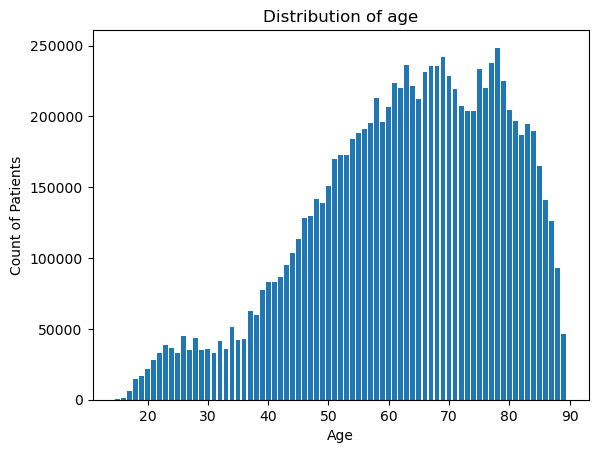

In [24]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [25]:
labs = labs.drop(columns=["Unnamed: 0"])
labs
# 8874120

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
0,100001.0,2117-09-11 11:46:00,2117-09-11 15:50:00,1.9,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,1.9,mg/dL
1,100001.0,2117-09-11 11:46:00,2117-09-11 19:31:00,2.0,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,2.0,mg/dL
2,100001.0,2117-09-11 11:46:00,2117-09-11 19:31:00,32.2,Hematocrit,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220545,ENGL,DIVORCED,PROTESTANT QUAKER,58526,32.2,%
3,100001.0,2117-09-11 11:46:00,2117-09-12 00:17:00,1.9,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,1.9,mg/dL
4,100001.0,2117-09-11 11:46:00,2117-09-12 04:36:00,2.0,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,2.0,mg/dL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844609,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,12.6,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220228,ENGL,MARRIED,JEWISH,40370,12.6,g/dl
9844610,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL
9844611,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L
9844612,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,539.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,227457,ENGL,MARRIED,JEWISH,40370,539.0,K/uL


In [26]:
labs = labs[labs.HADM_ID.isin(h_adm_1+h_adm_2)]

In [27]:
labs = labs[labs["AGE"]>=age_b]
labs = labs[labs["AGE"]<=age_a]

In [28]:
# labs = labs[labs["GENDER"]==gender]
labs = labs[labs["ETHNICITY"]==ethnicity]

In [29]:
labs.shape

(2071134, 31)

Text(0.5, 1.0, 'Distribution of age')

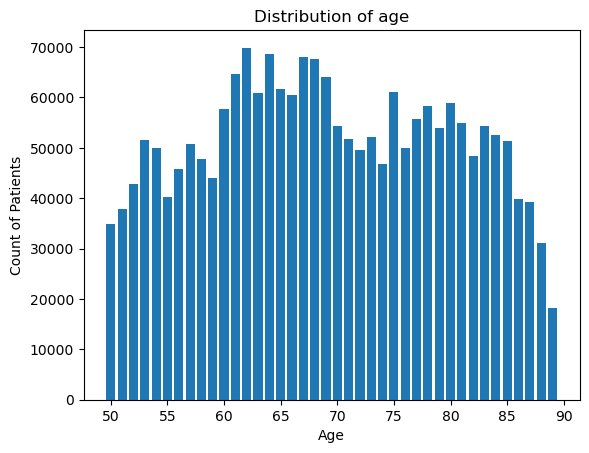

In [30]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

## Pairs

In [31]:
counts = med1.groupby(["MIMICExtractLabel"]).count()[["HADM_ID"]].sort_values("HADM_ID", ascending=False)
counts

,HADM_ID
MIMICExtractLabel,
NaCl 0.9%,8808
Dextrose 5%,7715
PO Intake,7433
Solution,6027
Magnesium Sulfate,5013
...,...
Aminophylline,1
Boost Glucose Control (3/4),1
Peptamen 1.5 (3/4),1


In [32]:
labitems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_LABITEMS.csv.gz"))
meditems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_ITEMS.csv.gz"))

In [33]:
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
238,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,1.9,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,1.9,mg/dL
239,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,21.3,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,21.3,%
240,100003.0,2150-04-17 15:34:00,2150-04-17 21:04:00,28.0,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,28.0,%
241,100003.0,2150-04-17 15:34:00,2150-04-18 03:20:00,31.8,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,31.8,%
242,100003.0,2150-04-17 15:34:00,2150-04-18 06:25:00,2.1,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,2.1,mg/dL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844609,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,12.6,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220228,ENGL,MARRIED,JEWISH,40370,12.6,g/dl
9844610,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL
9844611,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L
9844612,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,539.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,227457,ENGL,MARRIED,JEWISH,40370,539.0,K/uL


In [34]:
med1["STARTTIME"] = pd.to_datetime(med1["STARTTIME"])
med1["ENDTIME"] = pd.to_datetime(med1["ENDTIME"])
med1["ADMITTIME"] = pd.to_datetime(med1["ADMITTIME"])
med1["MedTimeFromAdmit"] = med1["ENDTIME"]-med1["ADMITTIME"]
med2["STARTTIME"] = pd.to_datetime(med2["STARTTIME"])
med2["ENDTIME"] = pd.to_datetime(med2["ENDTIME"])
med2["ADMITTIME"] = pd.to_datetime(med2["ADMITTIME"])
med2["MedTimeFromAdmit"] = med2["ENDTIME"]-med2["ADMITTIME"]
labs["CHARTTIME"] = pd.to_datetime(labs["CHARTTIME"])
labs["ADMITTIME"] = pd.to_datetime(labs["ADMITTIME"])
labs["LabTimeFromAdmit"] = labs["CHARTTIME"]-labs["ADMITTIME"]

In [35]:
med1["hours_in"] = med1["MedTimeFromAdmit"].dt.total_seconds()/3600
labs["hours_in"] = labs["LabTimeFromAdmit"].dt.total_seconds()/3600

In [36]:
labs["MIMICExtractName"] = labs["MIMICExtractName"].apply(lambda r: r.strip())
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM,LabTimeFromAdmit,hours_in
238,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,1.9,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,1.9,mg/dL,0 days 03:07:00,3.116667
239,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,21.3,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,21.3,%,0 days 03:07:00,3.116667
240,100003.0,2150-04-17 15:34:00,2150-04-17 21:04:00,28.0,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,28.0,%,0 days 05:30:00,5.500000
241,100003.0,2150-04-17 15:34:00,2150-04-18 03:20:00,31.8,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,31.8,%,0 days 11:46:00,11.766667
242,100003.0,2150-04-17 15:34:00,2150-04-18 06:25:00,2.1,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,2.1,mg/dL,0 days 14:51:00,14.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844609,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,12.6,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,220228,ENGL,MARRIED,JEWISH,40370,12.6,g/dl,5 days 02:51:00,122.850000
9844610,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL,5 days 02:51:00,122.850000
9844611,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L,5 days 02:51:00,122.850000
9844612,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,539.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,227457,ENGL,MARRIED,JEWISH,40370,539.0,K/uL,5 days 02:51:00,122.850000


In [37]:
lab_unique_names = labs[labs.HADM_ID.isin(med1.HADM_ID.unique())]["MIMICExtractName"].unique()
lab_unique_names

array(['Magnesium', 'Hematocrit', 'Albumin', 'Creatinine', 'Bilirubin',
       'Potassium', 'Hemoglobin', 'Lipase', 'Glucose',
       'Alanine aminotransferase', 'Sodium', 'Platelets',
       'Asparate aminotransferase', 'Prothrombin time INR', 'PTT',
       'Calcium', 'Calcium ionized', 'Potassium serum', 'Lactic acid',
       'Hemoglobin percent', 'Glucose urine', 'Amylase',
       'Creatinine urine', 'Potassium, Urine', 'Sodium, Urine',
       'Vitamin B12', 'Uric Acid', 'Calcium urine', 'Glucose, CSF',
       'Amylase, Body Fluid', 'Amylase, Ascites', 'Creatinine ascites',
       'Glucose, Ascites', 'Bilirubin, Total, Ascites',
       'Uric Acid, Urine', 'Red blood cell', 'Sodium, Stool',
       'Glucose, Pleural', 'Glucose, Body Fluid', 'Amylase, Pleural',
       'Creatinine pleural', 'Magnesium, Urine', 'Creatinine body fluid',
       'Potassium, Stool', 'Bilirubin, Total, Pleural', 'Large Platelets',
       'Bilirubin, Total, Body Fluid', 'Hemoglobin C', 'Hemoglobin F',
       '

In [38]:
t_med1 = med1.copy()
t_med1
# [med1["MIMICExtractLabel"].isin(med_vals_new)]
t_med2 = med2.copy()
# [med2["MIMICExtractLabel"].isin(med_vals_new)]

In [39]:
t_labs = labs.copy()
# [labs["MIMICExtractName"].isin(labtest_vals_new)]

In [86]:
t_labs.shape, labs.shape

((1179414, 33), (1227563, 33))

In [87]:
# Old - ((997, 65), (693, 64), (1319434, 39))
t_med1.shape, t_med2.shape, t_labs.shape

((13735, 65), (10522, 64), (1179414, 33))

In [ ]:
t_med1.t

In [40]:
t_med1.ITEMID.value_counts()

225158    8808
220949    7715
226452    7433
225943    6027
222011    5013
          ... 
227978       1
226036       1
225996       1
226020       1
226038       1
Name: ITEMID, Length: 261, dtype: int64

## Before After Trend Calculation

In [56]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
def check_med2(row):
    if row["HADM_ID"] in t_med2["HADM_ID"].to_list():
        if row["ITEMID"] in t_med2[t_med2["HADM_ID"]==row["HADM_ID"]]["ITEMID"].to_list():
            return True
    return False

def get_med2(row):
    temp = t_med2[t_med2["HADM_ID"]==row["HADM_ID"]] 
    return temp[temp["ITEMID"]==row["ITEMID"]].iloc[0]

In [61]:
from sklearn import datasets, linear_model, metrics

def get_normalized_trend(data):
    selected = data[['VALUENUM', 'hours_from_med']]
    if selected.shape[0]<2:
        return float("NaN")
    reg = linear_model.LinearRegression()
    reg.fit(np.array(data['hours_from_med']).reshape(-1,1), np.array(data['VALUENUM']).reshape(-1,1))
    return reg.coef_[0][0]

In [58]:
def get_normalized_trend_np(data):
    selected = data[['VALUENUM', 'hours_in']]
    print(selected)
    if selected.shape[0]<2:
        return float("NaN")
    print(np.array(data['hours_in']), np.array(data['VALUENUM']))
    t = np.polyfit(np.array(data['hours_in']), np.array(data['VALUENUM']), 1,full=True)
    coefficients, residuals, _, _, _ = t
    print(t)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    return 1

In [96]:
window = (1,25,4)

In [50]:
window_len = 1
before_windows = [(0,2), (2,5), (0,12)]
after_windows = [(0,2), (0,4), (2,5)]
# , (0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,9), (9,10), (10,11), (11,12)]

In [62]:
def get_vals(r):

    row = r.copy()
    for b_w in before_windows:
        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        b_window_start = row["MedTimeFromAdmit"].total_seconds() - (b_w[0]*3600)
        b_window_end = row["MedTimeFromAdmit"].total_seconds() - (b_w[1])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"before_abs_{b_w}"] = {}
            row[f"before_mean_{b_w}"] = {}
            row[f"before_trends_{b_w}"] = {}
            row[f"before_time_{b_w}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"before_abs_{b_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"before_mean_{b_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM"]].mean()["VALUENUM"].dropna().to_dict()
            row[f"before_trends_{b_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].apply(lambda r : get_normalized_trend(r)).dropna().to_dict()
            row[f"before_time_{b_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

    for a_w in after_windows:

        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        med2_bool = check_med2(row)
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        a_window_start = row["MedTimeFromAdmit"].total_seconds() + (a_w[0]*3600)
        a_window_end = row["MedTimeFromAdmit"].total_seconds() + (a_w[1])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        if med2_bool:
            med2_val = get_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
        
        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"after_abs_{a_w}"] = {}
            row[f"after_mean_{a_w}"] = {}
            row[f"after_trends_{a_w}"] = {}
            row[f"after_time_{a_w}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"after_abs_{a_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"after_mean_{a_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM"]].mean()["VALUENUM"].dropna().to_dict()
            row[f"after_trends_{b_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].apply(lambda r : get_normalized_trend(r)).dropna().to_dict()
            row[f"after_time_{a_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
            
    return row


    # for i in range(window[0], window[1], window[2]):

        # if i==1:
        #     lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        #     b_window_start = row["MedTimeFromAdmit"].total_seconds()
        #     b_window_end = row["MedTimeFromAdmit"].total_seconds() - 1*3600
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        #     lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        #     lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        #     t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        #     val_counts_m = t[t["SUBJECT_ID"]>=1]
        #     if val_counts_m.shape[0]==0:
        #         row[f"before_abs_0_0"] = {}
        #         row[f"before_time_0_0"] = {}
        #     else:
        #         l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
        #         row[f"before_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
        #         row[f"before_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

        #     lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        #     med2_bool = check_med2(row)
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        #     a_window_start = row["MedTimeFromAdmit"].total_seconds()
        #     a_window_end = row["MedTimeFromAdmit"].total_seconds() + 3600
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        #     lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        #     lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        #     if med2_bool:
        #         med2_val = get_med2(row)
        #         lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
            
        #     t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            
        #     val_counts_m = t[t["SUBJECT_ID"]>=1]
        #     if val_counts_m.shape[0]==0:
        #         row[f"after_abs_0_0"] = {}
        #         row[f"after_time_0_0"] = {}
        #     else:
        #         l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
        #         row[f"after_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
        #         row[f"after_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

In [64]:
# type = "abs"
all_types = set(["abs", "mean", "trends", "time"])
# other_cols = [f"before_{t}_{b_w}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{b_w}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b = [f"before_{t}_{b_w}" for b_w in before_windows for t in all_types]
cols_a = [f"after_{t}_{a_w}" for a_w in after_windows for t in all_types]
# cols_b.extend([f"before_{t}_0_0" for t in all_types])
# cols_a.extend([f"after_{t}_0_0" for t in all_types])
cols = cols_b.copy()
cols.extend(cols_a)

In [67]:
temp = t_med1.copy()
temp = temp.apply(lambda r : get_vals(r), axis=1)

In [68]:
temp

,ABBREVIATION,ADMISSION_LOCATION,ADMISSION_TYPE,ADMITTIME,AGE,AMOUNT,AMOUNTUOM,CANCELREASON,CATEGORY,CGID,...,"before_mean_(0, 12)","before_mean_(0, 2)","before_mean_(2, 5)","before_time_(0, 12)","before_time_(0, 2)","before_time_(2, 5)","before_trends_(0, 12)","before_trends_(0, 2)","before_trends_(2, 5)",hours_in
0,Pre-Admission Intake,EMERGENCY ROOM ADMIT,EMERGENCY,2155-02-03 20:16:00,80.0,3100.000000,ml,0,Fluids/Intake,21452,...,"{50811: 7.7, 50822: 4.4, 50893: 9.0, 50912: 1....",{},"{50811: 7.7, 50822: 4.4, 50893: 9.0, 50912: 1....","{50811: 4.616666666666666, 50822: 4.6166666666...",{},"{50811: 4.616666666666666, 50822: 4.6166666666...",{},{},{},2.750000
1,Pantoprazole (Protonix),EMERGENCY ROOM ADMIT,EMERGENCY,2155-02-03 20:16:00,80.0,1.000000,dose,0,Medications,21452,...,"{50811: 7.7, 50822: 4.4, 50893: 9.0, 50912: 1....","{220545: 26.6, 225664: 223.0}",{},"{50811: 6.433333333333334, 50822: 6.4333333333...","{220545: 1.3833333333333333, 225664: 0.8166666...",{},{},{},{},4.566667
2,Solution,EMERGENCY ROOM ADMIT,EMERGENCY,2155-02-03 20:16:00,80.0,10.000000,ml,0,Fluids/Intake,21452,...,"{50811: 7.7, 50822: 4.4, 50893: 9.0, 50912: 1....","{220545: 26.6, 225664: 223.0}",{},"{50811: 6.433333333333334, 50822: 6.4333333333...","{220545: 1.3833333333333333, 225664: 0.8166666...",{},{},{},{},4.566667
3,Insulin - Regular,EMERGENCY ROOM ADMIT,EMERGENCY,2155-02-03 20:16:00,80.0,4.000000,units,0,Medications,21452,...,"{50811: 7.7, 50822: 4.4, 50893: 9.0, 50912: 1....","{220545: 26.6, 225664: 223.0}",{},"{50811: 6.45, 50822: 6.45, 50893: 6.5, 50912: ...","{220545: 1.4, 225664: 0.8333333333333334}",{},{},{},{},4.583333
4,PRBC's,EMERGENCY ROOM ADMIT,EMERGENCY,2155-02-03 20:16:00,80.0,350.000004,ml,0,Blood Products/Colloids,21452,...,"{50811: 7.7, 50822: 4.4, 50893: 9.0, 50912: 1....",{},{},"{50811: 9.016666666666667, 50822: 9.0166666666...",{},{},{},{},{},9.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323002,Potassium Chloride - KCL,CLINIC REFERRAL/PREMATURE,EMERGENCY,2149-06-08 15:21:00,51.0,3.513333,mEq,0,Medications,14435,...,"{50893: 9.0, 50912: 0.8, 50931: 110.0, 50960: ...",{},"{50893: 9.0, 50912: 0.8, 50931: 110.0, 50960: ...","{50893: -13.466666666666667, 50912: -13.466666...",{},"{50893: -13.466666666666667, 50912: -13.466666...",{},{},{},76.633333
323003,NaCl 0.9%,CLINIC REFERRAL/PREMATURE,EMERGENCY,2149-06-08 15:21:00,51.0,250.000006,ml,0,Fluids/Intake,19710,...,"{50893: 9.05, 50912: 0.75, 50931: 114.0, 50960...","{50893: 9.1, 50912: 0.7, 50931: 118.0, 50960: ...",{},"{50893: -5.166666666666667, 50912: -5.16666666...","{50893: -5.166666666666667, 50912: -5.16666666...",{},"{50893: -0.010638297872340385, 50912: 0.010638...",{},{},82.716667
323004,K Phos,CLINIC REFERRAL/PREMATURE,EMERGENCY,2149-06-08 15:21:00,51.0,15.000000,mmol,0,Medications,19710,...,"{50893: 9.05, 50912: 0.75, 50931: 114.0, 50960...","{50893: 9.1, 50912: 0.7, 50931: 118.0, 50960: ...",{},"{50893: -5.166666666666667, 50912: -5.16666666...","{50893: -5.166666666666667, 50912: -5.16666666...",{},"{50893: -0.010638297872340385, 50912: 0.010638...",{},{},82.716667
323005,Insulin - Regular,CLINIC REFERRAL/PREMATURE,EMERGENCY,2149-06-08 15:21:00,51.0,2.000000,units,0,Medications,20081,...,{225664: 152.0},{225664: 152.0},{},{225664: 0.6666666666666666},{225664: 0.6666666666666666},{},{},{},{},95.333333


In [69]:
temp.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_first_val_{stratify_prefix}_doc_eval_new_win_analysis.csv"))

In [70]:
col_vals = []
for col in cols:
    col_vals.append(
        temp.assign(dict=temp[col].map(lambda d: d.items())).explode("dict", ignore_index=True).assign(
            LAB_ITEMID=lambda df: df.dict.str.get(0),
            temp=lambda df: df.dict.str.get(1)
        ).drop(columns=["dict"]+cols).astype({'temp':'float64'}).rename(columns={"temp":f"{col}_sp"}).dropna(subset=["LAB_ITEMID"])
    )

AttributeError: 'float' object has no attribute 'items'

In [ ]:
for i in range(1, len(col_vals)):
    col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="outer", on=list(t_med1.columns)+["LAB_ITEMID"])

In [ ]:
final = col_vals[-1][list(t_med1.columns)+["LAB_ITEMID"]+[f"{col}_sp" for col in cols]]

In [ ]:
# t_final = pd.merge(final.rename(columns={"LABEL":"MED_NAME"}), labitems.rename(columns={"ITEMID":"LAB_ITEMID"}), on="LAB_ITEMID", how="inner").rename(columns={"LABEL":"LAB_NAME"})
final["LAB_NAME"] = final["LAB_ITEMID"]
final = final.rename(columns={"ITEMID":"MED_NAME"})

In [ ]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"

final.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval_win_analysis.csv"))

In [9]:
# final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval_win.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_92298/2619123116.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval_win.csv"))


In [10]:
final

,Unnamed: 0,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,OldITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,...,"after_abs_(7, 8)_sp","after_time_(8, 9)_sp","after_abs_(8, 9)_sp","after_time_(9, 10)_sp","after_abs_(9, 10)_sp","after_time_(10, 11)_sp","after_abs_(10, 11)_sp","after_time_(11, 12)_sp","after_abs_(11, 12)_sp",LAB_NAME
0,0,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Calcium
1,1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creatinine
2,2,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.166667,90.0,Glucose
3,3,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,...,NaN,NaN,NaN,NaN,NaN,10.75,31.6,NaN,NaN,Hematocrit
4,4,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hemoglobin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287755,287755,77614,2070-09-16,M,2153-12-18 00:00:00,1,225168,140792,251027.0,2153-10-02 14:28:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.233333,23.8,Hematocrit
287756,287756,77711,2056-01-27,F,NaN,0,225913,147808,224771.0,2112-02-25 16:58:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.800000,26.0,PTT
287757,287757,77711,2056-01-27,F,NaN,0,225913,147808,224771.0,2112-02-25 16:58:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.800000,1.0,Prothrombin time INR
287758,287758,43799,2120-06-13,F,NaN,0,221794,199813,278149.0,2181-07-24 21:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.566667,20.9,PTT


## Plots Data Gen

In [ ]:
t_final = final.copy()
plot_data = {}
for b in [f"{c}_sp" for c in cols_b]:
    if b in t_final.columns:
        plot_data[b] = []
        for a in [f"{c}_sp" for c in cols_a]:
            if a in t_final.columns:
                plot_data[b].append(t_final.dropna(subset=[a,b]))
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [ ]:
plot_data_concat = {}
for i in plot_data:
    plot_data_concat[i] = pd.concat(plot_data[i])

In [ ]:
[(k, plot_data_concat[k].shape) for k in plot_data_concat]

[('before_abs_1_4_sp', (20964, 96)),
 ('before_time_1_4_sp', (20964, 96)),
 ('before_abs_5_4_sp', (24190, 96)),
 ('before_time_5_4_sp', (24190, 96)),
 ('before_abs_9_4_sp', (18018, 96)),
 ('before_time_9_4_sp', (18018, 96)),
 ('before_abs_13_4_sp', (15960, 96)),
 ('before_time_13_4_sp', (15960, 96)),
 ('before_abs_17_4_sp', (14982, 96)),
 ('before_time_17_4_sp', (14982, 96)),
 ('before_abs_21_4_sp', (11002, 96)),
 ('before_time_21_4_sp', (11002, 96)),
 ('before_abs_0_0_sp', (8728, 96)),
 ('before_time_0_0_sp', (8728, 96))]

In [ ]:
# type1 = "abs"
a_t = ["abs", "time"]
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b_sp = [(f"before_{a_t[0]}_{b_w}_sp", f"before_{a_t[1]}_{b_w}_sp") for b_w in before_windows]
cols_a_sp = [(f"after_{a_t[0]}_{a_w}_sp", f"after_{a_t[1]}_{a_w}_sp") for a_w in after_windows]
# cols_b_sp.append((f"before_abs_0_0_sp", f"before_time_0_0_sp"))
# cols_a_sp.append((f"after_abs_0_0_sp", f"after_time_0_0_sp"))
cols_sp = cols_b_sp.copy()
cols_sp.extend(cols_a_sp)

In [ ]:
t_final = final.copy()
plot_data = {}
for b in cols_b_sp:
    if b[0] in t_final.columns:
        plot_data[b[0]] = {}
        for a in cols_a_sp: 
            if a[0] in t_final.columns:
                # print(a, b)
                plot_data[b[0]][a[0]] = t_final.dropna(subset=[a[0], a[1], b[0], b[1]])
                # print(plot_data[b][a][[a, b]])
                # print(plot_data.keys())
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [ ]:
plot_data.keys()

dict_keys(['before_abs_1_4_sp', 'before_abs_5_4_sp', 'before_abs_9_4_sp', 'before_abs_13_4_sp', 'before_abs_17_4_sp', 'before_abs_21_4_sp', 'before_abs_0_0_sp'])

In [ ]:
import pickle
pickle.dump(plot_data, open(f"plot_bw_aw_med_lab_data_{stratify_prefix}_doc_eval_win.pkl", "wb"))

In [ ]:
cols_sp

[('before_abs_1_4_sp', 'before_time_1_4_sp'),
 ('before_abs_5_4_sp', 'before_time_5_4_sp'),
 ('before_abs_9_4_sp', 'before_time_9_4_sp'),
 ('before_abs_13_4_sp', 'before_time_13_4_sp'),
 ('before_abs_17_4_sp', 'before_time_17_4_sp'),
 ('before_abs_21_4_sp', 'before_time_21_4_sp'),
 ('before_abs_0_0_sp', 'before_time_0_0_sp'),
 ('after_abs_1_4_sp', 'after_time_1_4_sp'),
 ('after_abs_5_4_sp', 'after_time_5_4_sp'),
 ('after_abs_9_4_sp', 'after_time_9_4_sp'),
 ('after_abs_13_4_sp', 'after_time_13_4_sp'),
 ('after_abs_17_4_sp', 'after_time_17_4_sp'),
 ('after_abs_21_4_sp', 'after_time_21_4_sp'),
 ('after_abs_0_0_sp', 'after_time_0_0_sp')]

In [ ]:
final.columns

Index(['Unnamed: 0', 'SUBJECT_ID', 'DOB', 'GENDER', 'DOD', 'EXPIRE_FLAG',
       'OldITEMID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME', 'AMOUNT',
       'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID', 'ORDERID',
       'LINKORDERID', 'ORDERCATEGORYNAME', 'SECONDARYORDERCATEGORYNAME',
       'ORDERCOMPONENTTYPEDESCRIPTION', 'ORDERCATEGORYDESCRIPTION',
       'PATIENTWEIGHT', 'TOTALAMOUNT', 'TOTALAMOUNTUOM', 'ISOPENBAG',
       'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION',
       'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE',
       'ORIGINALAMOUNT', 'ORIGINALRATE', 'ROW_ID_y', 'SUBJECT_ID_y',
       'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID',
       'OldLabel', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY'

In [ ]:
cols_d = dict(cols_sp)

In [ ]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
# corr, _ = spearmanr(values, time_diff)
p_data = {}
for k in plot_data:
    print("Before Window: ", k)
    for i, (k_a, data) in enumerate(plot_data[k].items()):
        print("After Window: ", k_a)

        t_data = data.set_index([data["MED_NAME"], data["LAB_NAME"]])        
        med_lab_pairs = t_data.index
        
        for med_lab_pair in med_lab_pairs.unique():
            
            if med_lab_pair not in p_data.keys():
                p_data[med_lab_pair] = {}
            if k not in p_data[med_lab_pair].keys():
                p_data[med_lab_pair][k] = []
            
            t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
            t_d['abs'] = t_d[k_a]-t_d[k]
            t_d['percent'] = (t_d['abs']/t_d[k])*100
            t_d['ratio'] = t_d[k_a]/t_d[k]
            t_d.replace([np.inf, -np.inf], np.nan, inplace=True)
            t_d = t_d.dropna()
            
            p_data[med_lab_pair][k].append(t_d)

        # print(med_name_stats)
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["SUBJECT_ID"].value_counts().to_dict())
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["HADM_ID"].value_counts().to_dict())
        # t_lau = data[data["MED_NAME"]==list(med_name_stats.keys())[0]]

Before Window:  before_abs_1_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_0_0_sp
Before Window:  before_abs_5_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_9_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_13_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_0_0_sp
Before Window:  before_abs_17_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_21_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

Before Window:  before_abs_0_0_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

In [ ]:
p_data.keys()

dict_keys([('Insulin - Regular', 'Calcium'), ('Insulin - Regular', 'Creatinine'), ('Insulin - Regular', 'Glucose'), ('Insulin - Regular', 'Hemoglobin'), ('Insulin - Regular', 'Magnesium'), ('Insulin - Regular', 'PTT'), ('Insulin - Regular', 'Platelets'), ('Insulin - Regular', 'Potassium'), ('Insulin - Regular', 'Potassium serum'), ('Insulin - Regular', 'Prothrombin time INR'), ('Insulin - Regular', 'Sodium'), ('Omeprazole', 'Lactic acid'), ('Pantoprazole', 'Glucose'), ('Furosemide', 'Platelets'), ('Furosemide', 'Potassium'), ('Furosemide', 'Potassium serum'), ('Furosemide', 'Sodium'), ('Pantoprazole', 'Alanine aminotransferase'), ('Pantoprazole', 'Asparate aminotransferase'), ('Pantoprazole', 'Bilirubin'), ('Pantoprazole', 'Calcium'), ('Pantoprazole', 'Creatinine'), ('Pantoprazole', 'Hemoglobin'), ('Pantoprazole', 'PTT'), ('Pantoprazole', 'Platelets'), ('Pantoprazole', 'Potassium serum'), ('Pantoprazole', 'Prothrombin time INR'), ('Pantoprazole', 'Sodium'), ('Insulin - Regular', 'Lacti

In [93]:
import pickle
pickle.dump(p_data, open(f"plot_med_lab_bw_aw_data_{stratify_prefix}_doc_eval_win.pkl", "wb"))

In [94]:
# p_data = pickle.load(open(f"plot_med_lab_bw_aw_data_{stratify_prefix}.pkl", "rb"))

## Plots

In [41]:
def int_s(s):
    if s[0]=="_":
        return int(s[1:])
    else:
        return int(s)

In [42]:
mapping = {
    0: "(0-1)",
    1: "(1-5)",
    5: "(5-9)",
    9: "(9-13)",
    13: "(13-17)",
    17: "(17-21)",
    21: "(21-25)"
}

In [43]:
type_map = {
    'abs': "Absolute",
    'percent': "Percentage",
    'ratio': "Ratio"
}

In [44]:
lab_units_mapping = t_labs.groupby(["ITEMID", "VALUEUOM"]).count()["SUBJECT_ID"].reset_index().groupby("ITEMID").nth(0)[["VALUEUOM"]]
lab_units_mapping
# labs_with_name[["VALUEUOM"]]

,VALUEUOM
ITEMID,
786,mg/dl
813,%
814,gm/dl
833,/mic l
1522,mg/dl
...,...
227442,mEq/L
227456,g/dL
227457,K/uL


In [45]:
lab_units_mapping_dict = lab_units_mapping.to_dict()['VALUEUOM']

In [46]:
plot_dir = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval")
if not os.path.isdir(plot_dir):
    os.mkdir(plot_dir)
plot_dir1 = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval_all_window")
if not os.path.isdir(plot_dir1):
    os.mkdir(plot_dir1)

In [47]:
n_p_data = {}
if len([i for i in zip(med_vals_new, labtest_vals_new)]) < len(p_data):
    for k in [i for i in zip(med_vals_new, labtest_vals_new)]:
        if k in p_data:
            n_p_data[k] = p_data[k]

NameError: name 'med_vals_new' is not defined

In [48]:
len(n_p_data.keys()), len(p_data)

NameError: name 'p_data' is not defined

In [ ]:
n_p_data.keys()

dict_keys([('Ceftriaxone', 'Bilirubin'), ('Furosemide', 'Magnesium'), ('Pantoprazole', 'Vitamin B12'), ('Warfarin', 'Prothrombin time INR'), ('Insulin - Regular', 'Glucose'), ('Packed Red Blood Cells', 'Hemoglobin'), ('Calcium Gluconate (CRRT)', 'Calcium'), ('Calcium Gluconate (CRRT)', 'Calcium ionized'), ('Packed Red Blood Cells', 'Red blood cell'), ('Packed Red Blood Cells', 'Hematocrit'), ('Albumin 5%', 'Albumin'), ('Albumin 5%', 'Hematocrit'), ('Albumin 25%', 'Albumin'), ('Albumin 25%', 'Hematocrit'), ('Magnesium Sulfate', 'Magnesium')])

In [ ]:
old_p_data = p_data.copy()
p_data = n_p_data

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

def sort_rows_with_time(p_corrs, s_corrs, after_windows):
    s_p = sorted([k for k in zip(p_corrs, after_windows)], key=lambda k: k[1][0])
    p_corrs = [k[0][0] for k in s_p]
    after_windows1 = [str(k[1]) for k in s_p]
    s_s = sorted([k for k in zip(s_corrs, after_windows)], key=lambda k: k[1][0])
    s_corrs = [k[0][0] for k in s_s]
    after_windows2 = [str(k[1]) for k in s_p]
    return p_corrs, s_corrs, after_windows1, after_windows2

def plot_corrs(corrs, after_windows, ax, title='', plot_name='',  after_window_info=None):

    p_corrs = [c[0] for c in corrs]
    s_corrs = [c[1] for c in corrs]
    final_plot_name = f'{plot_name}_{title}'
    after_windows = [after_windows_map[a.split("_")[-2]] for a in after_windows]
    
    p_corrs, s_corrs, after_windows1, after_windows2 = sort_rows_with_time(p_corrs, s_corrs, after_windows)
    
    # print(ax, [ k for k in zip(p_corrs, after_windows)])
    # print(ax, [ k for k in zip(s_corrs, after_windows)])
    
    # ax.plot(after_windows, p_corrs)
    # ax.set_title(f'{final_plot_name} Pearsons Corr')
    # ax.set(xlabel='Time in hours', ylabel='Correlation')

    ax[0].plot(after_windows1, p_corrs, '-o')
    ax[0].set_title(f'{final_plot_name} Pearsons Corr')
    ax[0].set(xlabel='Time (h)', ylabel='Correlation')
    ax[0].set_xticks(after_windows1)
    ax[0].grid()
    # ax[0].grid(axis='x')

    ax[1].plot(after_windows2, s_corrs, '-o')
    ax[1].set_title(f'{final_plot_name} Spearmans Corr')
    ax[1].set(xlabel='Time (h)', ylabel='Correlation')
    ax[1].set_xticks(after_windows2)
    # ax[1].grid(axis='x')
    ax[1].grid()
    

def plot_func(lab, presc, d, dirname, window=(1,24), title='', unit='', labels=None, plot_name='', ax=None):
    
    plot_data = d
    # plot_data = plot_data.rename(columns={0:'Lab values'})

    # plot_data = plot_data[plot_data['timeFromPrescription'] > window[0]]
    # plot_data = plot_data[plot_data['timeFromPrescription'] < window[1]]

    if ax is None:
        sns.regplot(x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        plt.title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        plt.xlabel('Time (h)')
        plt.ylabel(f"{title} change in {lab} lab measurment ({unit})")
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            plt.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))
        if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}"))
        if dirname is None or dirname == "":
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", plot_name+".png"))
        else:
            if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname)):
                os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname))
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname, plot_name+".png"))
        plt.clf()
    
    else:
        sns.regplot(
                ax=ax,
                x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        ax.set_title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        ax.set(xlabel='Time (h)', ylabel=f"{title} change in {lab} lab measurment ({unit})")
        ax.grid()
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            ax.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))

def remove_outlier(val, time_diff):
    val = pd.DataFrame(val)
    time_diff = pd.DataFrame(time_diff)
    
    # IQR
    Q1 = np.percentile(val, 25, method = 'midpoint')        
    Q3 = np.percentile(val, 75, method = 'midpoint')
    IQR = Q3 - Q1        
    
    # Upper bound
    upper = np.where(val >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(val <= (Q1-1.5*IQR))

    # Filtering
    if len(upper) > 0:
        val.drop(upper[0], inplace = True)
        time_diff.drop(upper[0], inplace = True)
    if len(lower) > 0:
        val.drop(lower[0], inplace = True)
        time_diff.drop(lower[0], inplace = True)
    return val, time_diff

In [ ]:
types = ['abs', 'percent', 'ratio']
type = ""
corrs_data_dict = []
for k, v in p_data.items():
    for key in v:
        if "/" in k[0]:
            presc = k[0].split("/")[0]
        else:
            presc = k[0]
        lab = k[1]
        before_window = before_windows_map[key.split("_")[-2]]

        fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
        fig_all.suptitle(f'{lab}<>{presc} (before window = {str(before_window)})')

        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}"))
        
        dirname=f"bw_{before_window}"
        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname)):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname))
        
        for i, type1 in enumerate(types):
            del type
            plot_name = f"{lab}<>{presc}_{key}_{type1}"
            data_vals = [d[[list(d.columns)[-4], type1]].rename(columns={list(d.columns)[-4] : "time"}) for d in v[key] if type(d) != pd.Series]
            after_names = [list(d.columns)[3] for d in v[key] if type(d) != pd.Series]
            type = type1
            if len(data_vals)!=len(after_names):
                print(data_vals)
                print(after_names)
                print()
                continue
            if len(data_vals)==0:
                continue
            d = pd.concat(data_vals)
            if d.shape[0]<2:
                continue
            if d.shape[0]>1:
                d1, d2 = remove_outlier(d[type], d["time"])
            else:
                d1, d2 = d[[type]], d[["time"]]
            d = pd.concat([d1, d2], axis=1)

            p_corr = pearsonr(d1[type], d2["time"])
            s_corr = spearmanr(d1[type], d2["time"])

            unit = lab_units_mapping_dict[lab] if lab in lab_units_mapping_dict else ""
            plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname="", labels=(p_corr, s_corr), unit=unit, title=f"bw{before_window} {type_map[type]}", plot_name=f"{plot_name}", ax=ax_all[i])

            fig_corrs, ax_corrs = plt.subplots(2, figsize=(20, 20))
            fig_corrs.suptitle(f'{lab}<>{presc} {type} corrs') 
            corrs = []
            data_t = []
            temp_after_names = after_names.copy()
            for i, d in enumerate(data_vals):
                if d.shape[0]<2:
                    temp_after_names.remove(after_names[i])
                    continue
                if d.shape[0]>1:
                    d1, d2 = remove_outlier(d[type], d["time"])
                else:
                    d1, d2 = d[[type]], d[["time"]]
                p_corr = pearsonr(d1[type], d2["time"])
                s_corr = spearmanr(d1[type], d2["time"])
                corrs.append((p_corr, s_corr))
                data_t.append([d1, d2])
            after_names = temp_after_names
            plot_corrs(corrs, after_names, ax_corrs, title=type, plot_name=plot_name)
            # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
            #     fig_corrs.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{type}_{stratify_prefix}_corrs.png"))
            # else:
            fig_corrs.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{type}_{stratify_prefix}_corrs.png"))
            fig_corrs.clf()

            for d, a, c, t in zip(data_vals, after_names, corrs, data_t):
                # if d.shape[0]<2:
                #     continue
                # if d.shape[0]>1:
                #     d1, d2 = remove_outlier(d[type], d["time"])
                # else:
                # d1, d2 = d[[type]], d[["time"]]
                d = pd.concat(t, axis=1)

                # p_corr = pearsonr(d1[type], d2["time"])
                # s_corr = spearmanr(d1[type], d2["time"])
                p_corr = c[0]
                s_corr = c[1]
                after_window = after_windows_map[a.split("_")[-2]]

                plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname=dirname, labels=c, unit=unit, title=f"bw{before_window} aw{after_window} {type_map[type]}", plot_name=f"{plot_name} bw{before_window} aw{after_window}")
                corrs_data_dict.append({
                    "lab" : lab,
                    "med": presc,
                    "bw": before_window,
                    "aw": after_window,
                    "Type": type_map[type],
                    "Pearson Correlation": p_corr[0],
                    "Pearson Correlation (p-value)": p_corr[1],
                    "Spearmans Correlation ": s_corr[0],
                    "Spearmans Correlation (p-value)": s_corr[1],
                    "Num of Data Points (n)": d.shape[0]
                })
        # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
        #     fig_all.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{stratify_prefix}.png"))
        # else:         
        fig_all.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{stratify_prefix}.png"))
        fig_all.clf()
corrs_data_df = pd.DataFrame(corrs_data_dict)
corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_18933/4085206200.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-pack

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# corrs_data_df = pd.DataFrame(corrs_data_dict)


In [ ]:
corrs_data_df

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
0,Bilirubin,Ceftriaxone,"(0, 12)","(0, 1)",Absolute,0.038318,0.901094,-0.020161,0.947878,13
1,Bilirubin,Ceftriaxone,"(0, 12)","(1, 2)",Absolute,-0.481719,0.273693,-0.414431,0.355269,7
2,Bilirubin,Ceftriaxone,"(0, 12)","(2, 3)",Absolute,-0.424824,0.475838,-0.100000,0.872889,5
3,Bilirubin,Ceftriaxone,"(0, 12)","(3, 4)",Absolute,0.037909,0.935690,-0.396412,0.378635,7
4,Bilirubin,Ceftriaxone,"(0, 12)","(4, 5)",Absolute,-0.143732,0.712186,-0.200839,0.604359,9
...,...,...,...,...,...,...,...,...,...,...
811,Magnesium,Magnesium Sulfate,"(0, 6)","(7, 8)",Ratio,-0.060026,0.467103,-0.045323,0.583097,149
812,Magnesium,Magnesium Sulfate,"(0, 6)","(8, 9)",Ratio,0.000300,0.997210,0.005429,0.949609,138
813,Magnesium,Magnesium Sulfate,"(0, 6)","(9, 10)",Ratio,-0.047773,0.610577,-0.072455,0.439565,116
814,Magnesium,Magnesium Sulfate,"(0, 6)","(10, 11)",Ratio,-0.146514,0.123196,-0.166843,0.078708,112


In [ ]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>100].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
192,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Absolute,-0.142859,0.000005,-0.167868,7.031228e-08,1019
204,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Percentage,-0.140957,0.000006,-0.170166,4.622786e-08,1019
216,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Ratio,-0.140957,0.000006,-0.170166,4.622786e-08,1019
228,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Absolute,-0.135118,0.000020,-0.151135,1.824418e-06,988
252,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Ratio,-0.130453,0.000039,-0.153451,1.259906e-06,988
240,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Percentage,-0.130453,0.000039,-0.153451,1.259906e-06,988
242,Glucose,Insulin - Regular,"(0, 6)","(2, 3)",Percentage,-0.121102,0.011288,-0.132970,5.367733e-03,437
254,Glucose,Insulin - Regular,"(0, 6)","(2, 3)",Ratio,-0.121102,0.011288,-0.132970,5.367733e-03,437
218,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Ratio,-0.113597,0.016271,-0.127405,6.994456e-03,447
206,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Percentage,-0.113597,0.016271,-0.127405,6.994456e-03,447


In [ ]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Pearson Correlation"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
273,Hemoglobin,Packed Red Blood Cells,"(0, 12)","(9, 10)",Absolute,-0.308670,0.046712,-0.304867,0.049629,42
285,Hemoglobin,Packed Red Blood Cells,"(0, 12)","(9, 10)",Percentage,-0.287431,0.064934,-0.302219,0.051745,42
297,Hemoglobin,Packed Red Blood Cells,"(0, 12)","(9, 10)",Ratio,-0.287431,0.064934,-0.302219,0.051745,42
309,Hemoglobin,Packed Red Blood Cells,"(0, 6)","(9, 10)",Absolute,-0.271494,0.139567,-0.284632,0.120677,31
321,Hemoglobin,Packed Red Blood Cells,"(0, 6)","(9, 10)",Percentage,-0.237803,0.197679,-0.267872,0.145134,31
333,Hemoglobin,Packed Red Blood Cells,"(0, 6)","(9, 10)",Ratio,-0.237803,0.197679,-0.267872,0.145134,31
633,Hematocrit,Albumin 5%,"(0, 6)","(0, 1)",Percentage,-0.197886,0.078487,-0.140225,0.214748,80
645,Hematocrit,Albumin 5%,"(0, 6)","(0, 1)",Ratio,-0.197886,0.078487,-0.140225,0.214748,80
558,Hematocrit,Packed Red Blood Cells,"(0, 6)","(6, 7)",Ratio,-0.194959,0.184214,-0.081775,0.580576,48
546,Hematocrit,Packed Red Blood Cells,"(0, 6)","(6, 7)",Percentage,-0.194959,0.184214,-0.081775,0.580576,48


In [ ]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>50].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
192,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Absolute,-0.142859,0.000005,-0.167868,7.031228e-08,1019
216,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Ratio,-0.140957,0.000006,-0.170166,4.622786e-08,1019
204,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Percentage,-0.140957,0.000006,-0.170166,4.622786e-08,1019
228,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Absolute,-0.135118,0.000020,-0.151135,1.824418e-06,988
240,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Percentage,-0.130453,0.000039,-0.153451,1.259906e-06,988
252,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Ratio,-0.130453,0.000039,-0.153451,1.259906e-06,988
242,Glucose,Insulin - Regular,"(0, 6)","(2, 3)",Percentage,-0.121102,0.011288,-0.132970,5.367733e-03,437
254,Glucose,Insulin - Regular,"(0, 6)","(2, 3)",Ratio,-0.121102,0.011288,-0.132970,5.367733e-03,437
218,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Ratio,-0.113597,0.016271,-0.127405,6.994456e-03,447
206,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Percentage,-0.113597,0.016271,-0.127405,6.994456e-03,447


In [ ]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>50].sort_values(["Spearmans Correlation (p-value)"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
204,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Percentage,-0.140957,0.000006,-0.170166,4.622786e-08,1019
216,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Ratio,-0.140957,0.000006,-0.170166,4.622786e-08,1019
192,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Absolute,-0.142859,0.000005,-0.167868,7.031228e-08,1019
252,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Ratio,-0.130453,0.000039,-0.153451,1.259906e-06,988
240,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Percentage,-0.130453,0.000039,-0.153451,1.259906e-06,988
228,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Absolute,-0.135118,0.000020,-0.151135,1.824418e-06,988
230,Glucose,Insulin - Regular,"(0, 6)","(2, 3)",Absolute,-0.113505,0.017613,-0.146722,2.104831e-03,437
194,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Absolute,-0.108234,0.022100,-0.140775,2.855750e-03,447
242,Glucose,Insulin - Regular,"(0, 6)","(2, 3)",Percentage,-0.121102,0.011288,-0.132970,5.367733e-03,437
254,Glucose,Insulin - Regular,"(0, 6)","(2, 3)",Ratio,-0.121102,0.011288,-0.132970,5.367733e-03,437


In [ ]:
# corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))